In [9]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [10]:
from load_data import load_datasets
credit_dataset = load_datasets(["Credit Risk"])

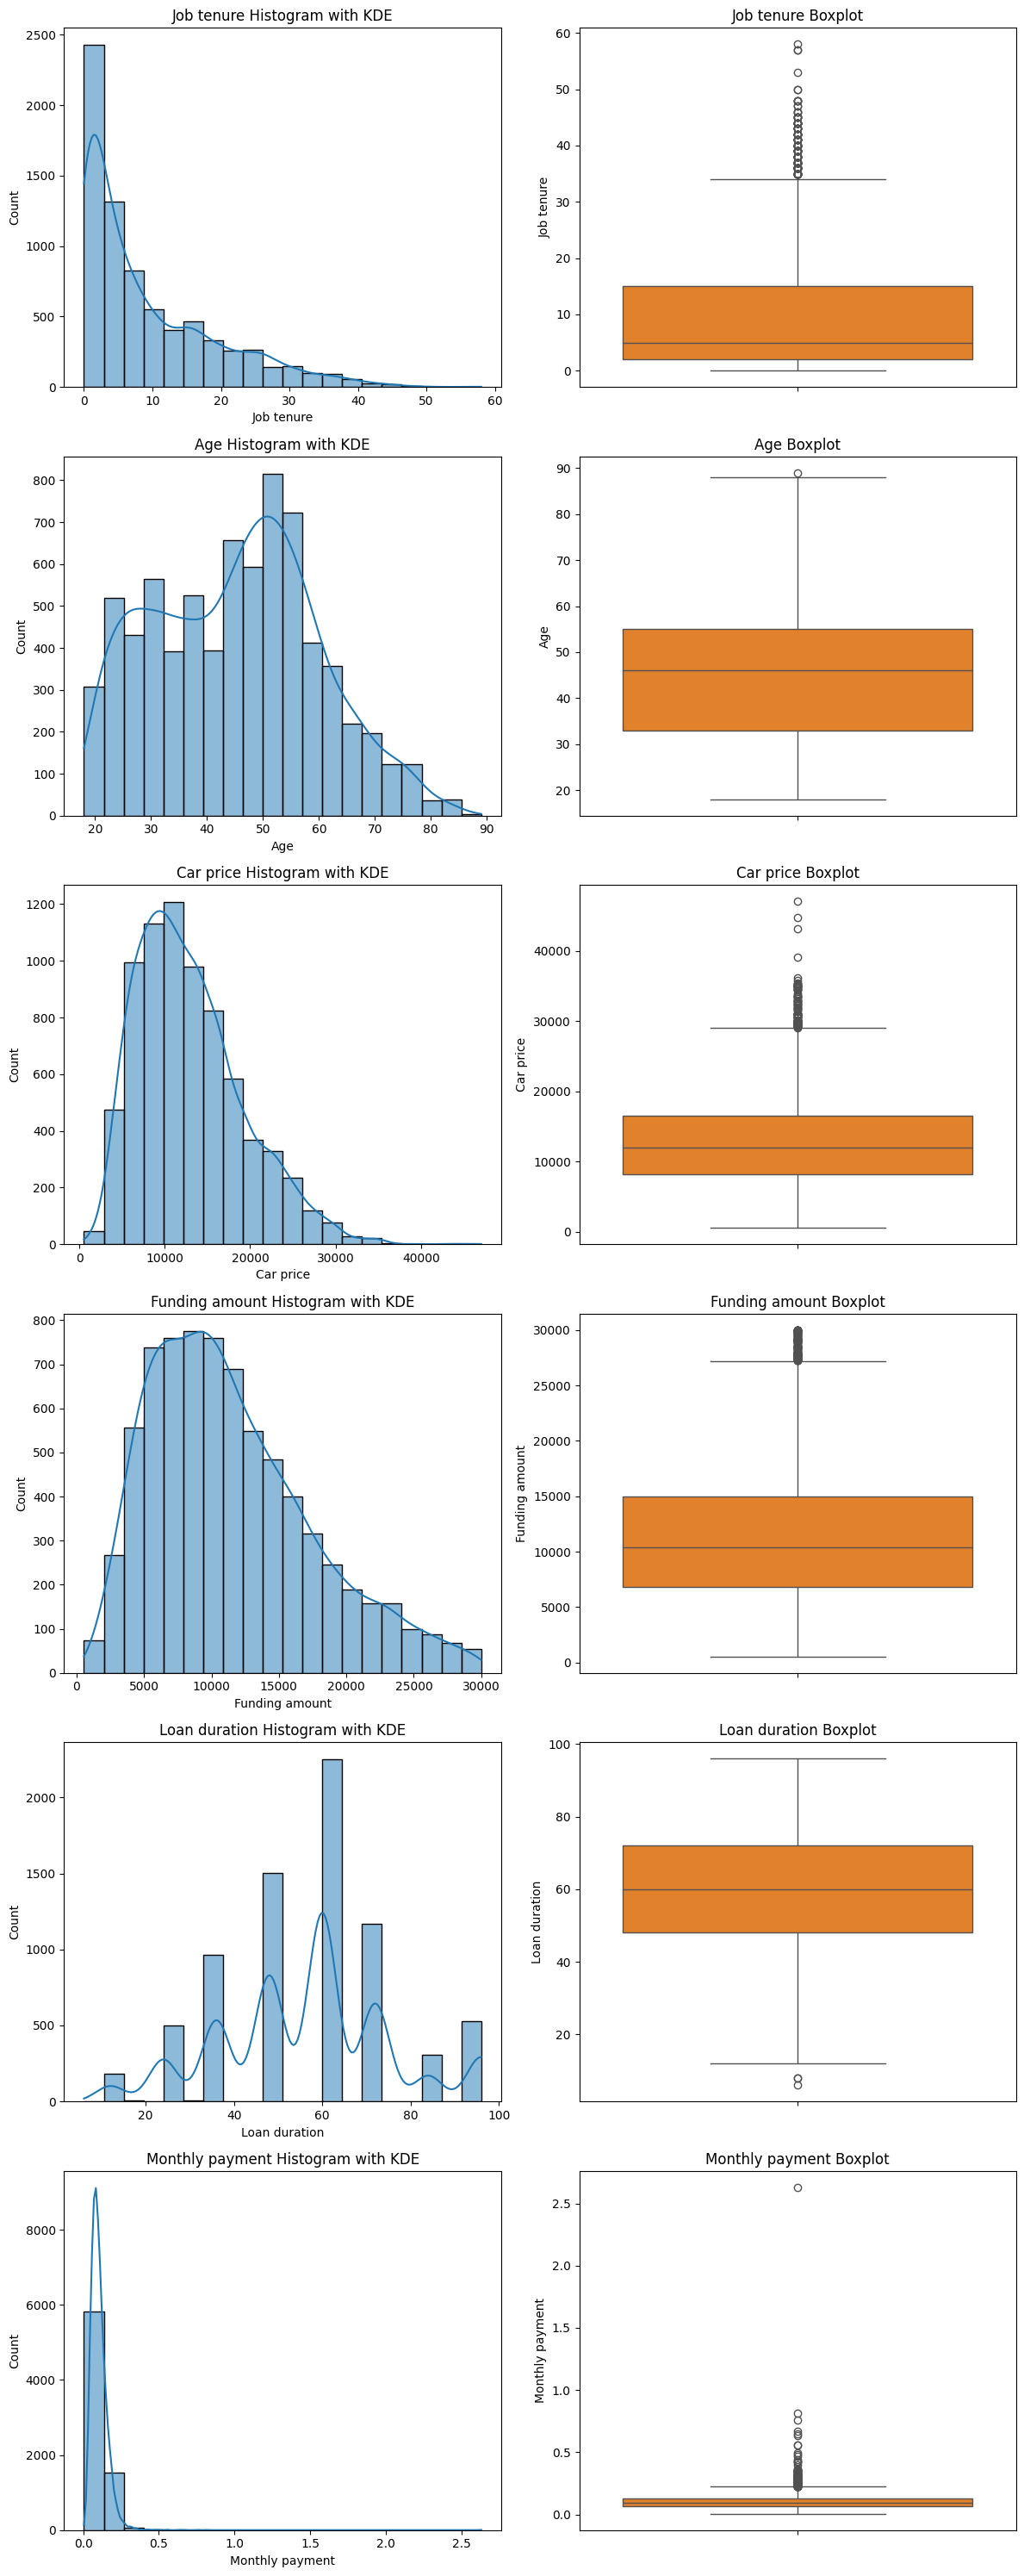

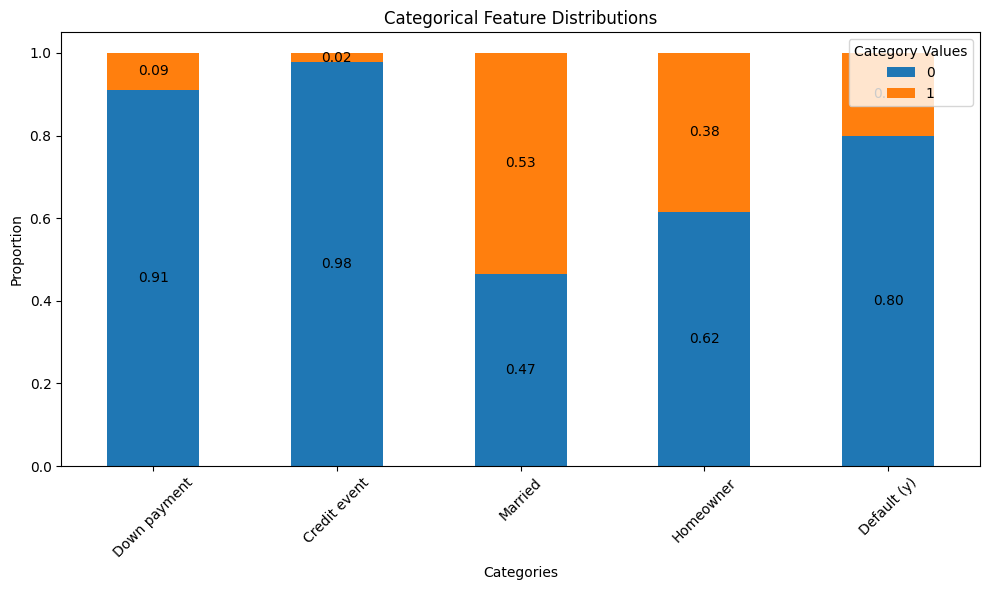

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data
df = credit_dataset['Credit Risk'][0]

# Define numerical and categorical columns
numerical_columns = ["Job tenure", "Age", "Car price", "Funding amount", "Loan duration", "Monthly payment"]
categorical_columns = ["Down payment", "Credit event", "Married", "Homeowner", "Default (y)"]

# Create subplots for numerical variables
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Histogram with KDE
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i, 0], color="tab:blue")
    axes[i, 0].set_title(f"{col} Histogram with KDE")
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[i, 1], color="tab:orange")
    axes[i, 1].set_title(f"{col} Boxplot")

plt.tight_layout()
plt.show()
# Create a single stacked bar chart for categorical variables
fig, ax = plt.subplots(figsize=(10, 6))

# Compute proportions for each category
cat_data = pd.DataFrame()
for col in categorical_columns:
    counts = df[col].value_counts(normalize=True)
    cat_data = pd.concat([cat_data, counts], axis=1)

# Transpose and plot stacked bars
cat_data.fillna(0, inplace=True)
bars = cat_data.T.plot(kind='bar', stacked=True, ax=ax)

# Add values on bars
for container in bars.containers:
    ax.bar_label(container, fmt="%.2f", label_type="center", fontsize=10, color="black")



ax.set_ylabel("Proportion")
ax.set_xlabel("Categories")
ax.set_title("Categorical Feature Distributions")
ax.legend(title="Category Values")
plt.xticks(ticks=[0, 1, 2, 3, 4], rotation=45, labels=categorical_columns)
plt.tight_layout()
plt.show()


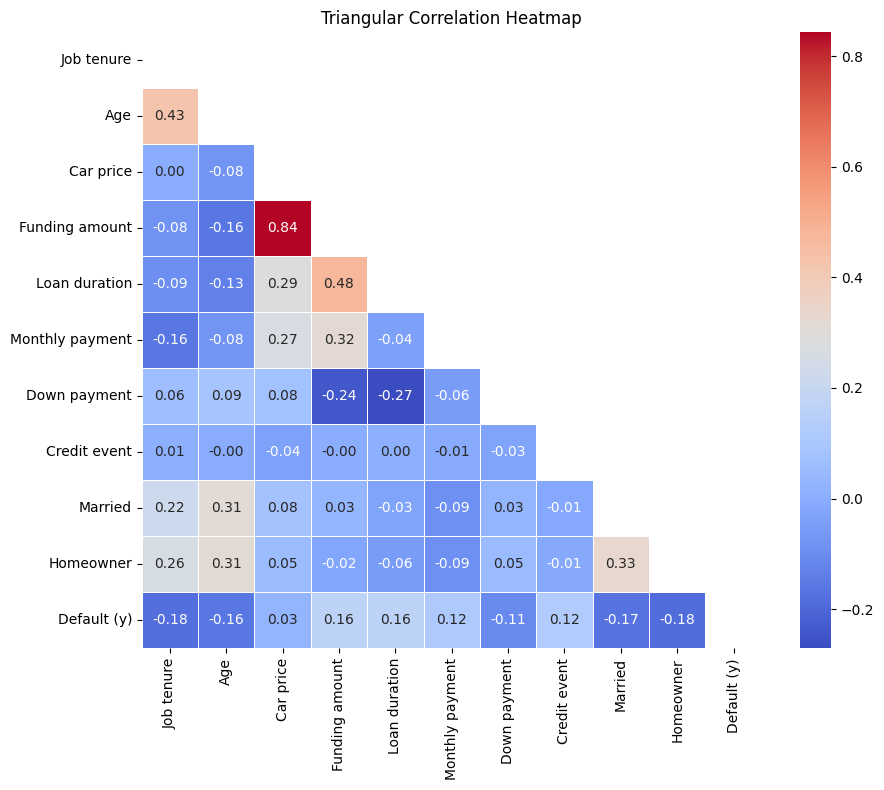

In [12]:
# Create a triangular correlation heatmap
corr = df[numerical_columns + categorical_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Triangular Correlation Heatmap")
plt.show()


In [13]:
df.describe()

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y)
count,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000
mean,9.329475,45.169717,12931.183311,11457.803769,0.089367,56.220054,0.105143,0.022073,0.534859,0.384926,0.199865
std,9.978638,14.790760,6202.407112,6015.033981,0.285293,19.385787,0.061121,0.146930,0.498817,0.486611,0.399926
min,0.000000,18.000000,546.000000,546.000000,0.000000,6.000000,0.005128,0.000000,0.000000,0.000000,0.000000
25%,2.000000,33.000000,8147.750000,6845.250000,0.000000,48.000000,0.069032,0.000000,0.000000,0.000000,0.000000
50%,5.000000,46.000000,11950.000000,10382.500000,0.000000,60.000000,0.094662,0.000000,1.000000,0.000000,0.000000
75%,15.000000,55.000000,16500.000000,15000.000000,0.000000,72.000000,0.130393,0.000000,1.000000,1.000000,0.000000
max,58.000000,89.000000,47051.000000,30000.000000,1.000000,96.000000,2.630000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.head()

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y)
0,34,55,4875,3087,0,36,0.047895,0,1,1,0
1,5,29,13000,13000,0,60,0.091667,0,0,0,1
2,14,38,17190,14190,0,60,0.088235,0,0,0,0
3,16,37,22773,23568,0,48,0.110084,0,1,1,0
4,1,61,7700,8526,0,48,0.123404,0,1,0,1


In [15]:
exp_path = os.path.join("experiments", "experiment_results_17022025231258", "credit_risk")
data_path = os.path.join(exp_path, "data", "full_dataset.csv")

df = pd.read_csv(data_path, index_col=0)

In [16]:
X = df.drop(columns=["Default (y)"])
y = df["Default (y)"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [18]:
import pandas as pd
from scipy import stats

# Assume X_train and X_test are pandas DataFrames with your features.

def test_train_test_distributions(X_train, X_test):
    results = {}
    for col in X_train.columns:
        # Perform the KS test
        stat, p_value = stats.ks_2samp(X_train[col], X_test[col])
        results[col] = {"ks_stat": stat, "p_value": p_value}
        print(f"Feature: {col:20s} | KS Statistic: {stat:.4f} | p-value: {p_value:.4f}")
    return results

# Run the test
distribution_results = test_train_test_distributions(X_train, X_test)


Feature: Job tenure           | KS Statistic: 0.0375 | p-value: 0.3243
Feature: Age                  | KS Statistic: 0.0369 | p-value: 0.3440
Feature: Car price            | KS Statistic: 0.0275 | p-value: 0.7120
Feature: Funding amount       | KS Statistic: 0.0194 | p-value: 0.9677
Feature: Down payment         | KS Statistic: 0.0153 | p-value: 0.9980
Feature: Loan duration        | KS Statistic: 0.0141 | p-value: 0.9995


- p > 0.05: There is no strong evidence to reject the null hypothesis; the train and test distributions for that feature are statistically similar.
- p ≤ 0.05: The distributions differ significantly.

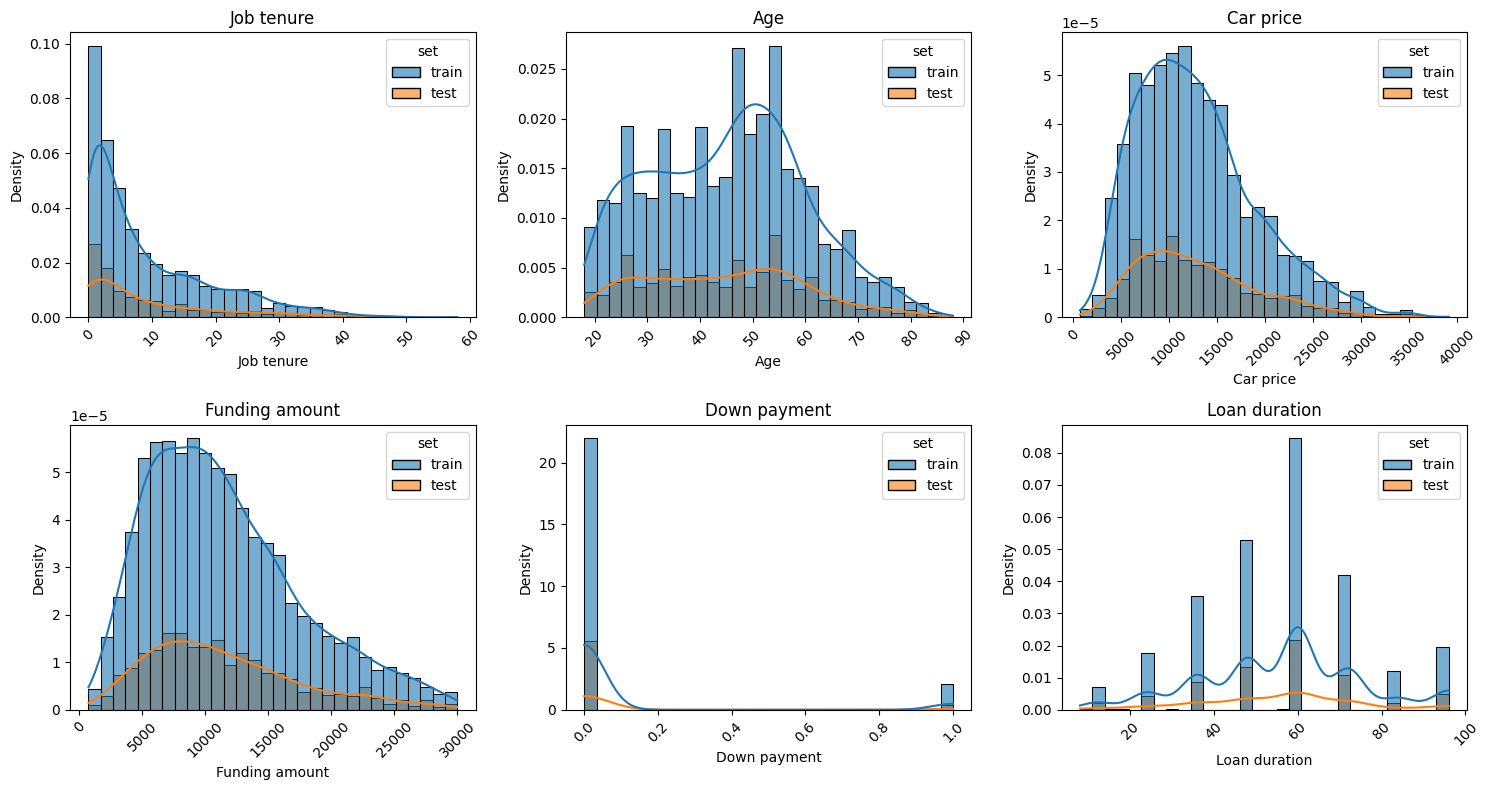

In [19]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split


# 2. Create density/histogram charts in a dense grid.
# First, combine train and test data with an indicator column.
X_train_cp = X_train.copy()
X_test_cp = X_test.copy()
X_train_cp["set"] = "train"
X_test_cp["set"] = "test"
df_combined = pd.concat([X_train_cp, X_test_cp], ignore_index=True)

features = X_train.columns  # all feature names
n_features = len(features)
n_cols = 3  # Adjust number of columns in the grid as desired.
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, feature in enumerate(features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    # Plot both histogram and KDE for train vs test using hue.
    sns.histplot(data=df_combined,
                 x=feature,
                 hue="set",
                 bins=30,
                 kde=True,
                 stat="density",   # Normalizes the y-axis for better comparison.
                 alpha=0.6,
                 ax=ax)
    ax.set_title(feature)
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
